## 5. Broadcasting

In [4]:
my_3D_arr = np.arange(70).reshape((2,7,5))
my_3D_arr

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]],

       [[35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69]]])

In [5]:
my_3D_arr.ndim

3

In [6]:
my_3D_arr * 3 - 3

array([[[ -3,   0,   3,   6,   9],
        [ 12,  15,  18,  21,  24],
        [ 27,  30,  33,  36,  39],
        [ 42,  45,  48,  51,  54],
        [ 57,  60,  63,  66,  69],
        [ 72,  75,  78,  81,  84],
        [ 87,  90,  93,  96,  99]],

       [[102, 105, 108, 111, 114],
        [117, 120, 123, 126, 129],
        [132, 135, 138, 141, 144],
        [147, 150, 153, 156, 159],
        [162, 165, 168, 171, 174],
        [177, 180, 183, 186, 189],
        [192, 195, 198, 201, 204]]])

#### Arrays with smaller dimension are broadcasted to match the larger arrays without copying data.

In [27]:
a = np.arange(0,31,10)
b = np.arange(0, 3)
print(a[:, np.newaxis] + b)
print(b[np.newaxis, :] + a[:, np.newaxis])
print(a[np.newaxis, :] + b[:, np.newaxis])

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
[[ 0 10 20 30]
 [ 1 11 21 31]
 [ 2 12 22 32]]


## Graphical View
![Graphical example of numpy broadcasting](img/numpy_broadcasting.png)
**[Source](http://www.scipy-lectures.org/_images/numpy_broadcasting.png)**

In [28]:
x = np.array([1, 2])
y = np.array([3, 4, 5])
z = x[np.newaxis, :] + y[:, np.newaxis]
z

array([[4, 5],
       [5, 6],
       [6, 7]])

### Point to be noted
The trailing axes of either arrays must be 1 or both must have the same size for broadcasting to occur. Otherwise, a 
"ValueError: shape mismatch: obj ects cannot be  exception is thrown. 
![warning](broadcastin_mismatch.png)

### An application: Distance from center

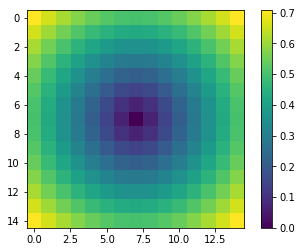

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
a = np.linspace(0, 1, 15) - 0.5
b = a[:, np.newaxis] # b.shape == (15, 1)
dist2 = a**2 + b**2 # broadcasting sum.
dist = np.sqrt(dist2)
plt.imshow(dist)
plt.colorbar();

In [58]:
x = np.linspace(0, 1, 15, retstep=True)
x

(array([ 0.        ,  0.07142857,  0.14285714,  0.21428571,  0.28571429,
         0.35714286,  0.42857143,  0.5       ,  0.57142857,  0.64285714,
         0.71428571,  0.78571429,  0.85714286,  0.92857143,  1.        ]),
 0.07142857142857142)

In [67]:
a, b = np.ogrid[0:1:0.07, 0:1:0.07]
print(a.shape, b.shape)
a -= 0.5
b -= 0.5
a, b

(15, 1) (1, 15)


(array([[-0.5 ],
        [-0.43],
        [-0.36],
        [-0.29],
        [-0.22],
        [-0.15],
        [-0.08],
        [-0.01],
        [ 0.06],
        [ 0.13],
        [ 0.2 ],
        [ 0.27],
        [ 0.34],
        [ 0.41],
        [ 0.48]]),
 array([[-0.5 , -0.43, -0.36, -0.29, -0.22, -0.15, -0.08, -0.01,  0.06,
          0.13,  0.2 ,  0.27,  0.34,  0.41,  0.48]]))

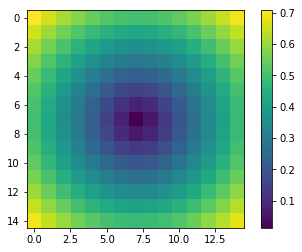

In [68]:
dist2 = a**2 + b**2 # broadcasting sum.
dist = np.sqrt(dist2)
plt.imshow(dist)
plt.colorbar();

## 6. Structure & Record arrays
Structured and record arrays are designed for heterogeneous data, while maintaining NumPy's requirement that every element in an array use the same amount of memory space.

In [69]:
person_data_def = [('name','S6'),('height','f8'),('weight','f8'), ('age', 'i8')]
person_data_def

[('name', 'S6'), ('height', 'f8'), ('weight', 'f8'), ('age', 'i8')]

In [70]:
people_array = np.zeros((4,), dtype=person_data_def)
people_array

array([(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0),
       (b'', 0.0, 0.0, 0)], 
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [71]:
people_array[3] = ('Delta', 73, 205, 34)
people_array[0] = ('Alpha', 65, 112, 23)
people_array

array([(b'Alpha', 65.0, 112.0, 23), (b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0),
       (b'Delta', 73.0, 205.0, 34)], 
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [73]:
people_array[0::2]

array([(b'Alpha', 65.0, 112.0, 23), (b'', 0.0, 0.0, 0)], 
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [76]:
ages = people_array['age']
ages

array([23,  0,  0, 34], dtype=int64)

In [77]:
make_youthful = ages / 2
make_youthful

array([ 11.5,   0. ,   0. ,  17. ])

In [78]:
people_array

array([(b'Alpha', 65.0, 112.0, 23), (b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0),
       (b'Delta', 73.0, 205.0, 34)], 
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [79]:
ages

array([23,  0,  0, 34], dtype=int64)

### Multidimentional Structed Array

In [80]:
people_big_array = np.zeros((4,3,2), dtype=person_data_def)
people_big_array

array([[[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)]],

       [[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)]],

       [[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)]],

       [[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)]]], 
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [81]:
people_big_array[3,2,1] = ('Echo', 68, 155, 46)
people_big_array

array([[[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)]],

       [[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)]],

       [[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)]],

       [[(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'', 0.0, 0.0, 0)],
        [(b'', 0.0, 0.0, 0), (b'Echo', 68.0, 155.0, 46)]]], 
      dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [82]:
people_big_array['height']

array([[[  0.,   0.],
        [  0.,   0.],
        [  0.,   0.]],

       [[  0.,   0.],
        [  0.,   0.],
        [  0.,   0.]],

       [[  0.,   0.],
        [  0.,   0.],
        [  0.,   0.]],

       [[  0.,   0.],
        [  0.,   0.],
        [  0.,  68.]]])

In [83]:
people_big_array[['height', 'weight']]

array([[[(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (0.0, 0.0)]],

       [[(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (0.0, 0.0)]],

       [[(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (0.0, 0.0)]],

       [[(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (0.0, 0.0)],
        [(0.0, 0.0), (68.0, 155.0)]]], 
      dtype=[('height', '<f8'), ('weight', '<f8')])

### Creating Record Arrays

In [84]:
person_record_array = np.rec.array([('Delta', 73, 205, 34),('Alpha', 65, 112, 23)],dtype=person_data_def)
person_record_array

rec.array([(b'Delta', 73.0, 205.0, 34), (b'Alpha', 65.0, 112.0, 23)], 
          dtype=[('name', 'S6'), ('height', '<f8'), ('weight', '<f8'), ('age', '<i8')])

In [85]:
person_record_array[0].age

34

In [86]:
person_record_array.age

array([34, 23], dtype=int64)

# 7. Array Calculation

In [1]:
import numpy as np

In [11]:
arange_arr = np.arange(12).reshape(3,4)
arange_arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
# sum
print(arange_arr.sum()) # alternative: np.sum(a)
print("Column-sum:", arange_arr.sum(axis=0)) # column-sum
print("Row-sum:", arange_arr.sum(axis=1)) # row-sum


66
Column-sum: [12 15 18 21]
Row-sum: [ 6 22 38]


In [96]:
#min/max
rand_arr = np.random.randint(1, 50, size=15).reshape(3,5)
print("Array:\n", rand_arr)
print("Min:", rand_arr.min())
print("Max:", rand_arr.max())

print("Column-min:", np.min(rand_arr, axis=0)) # column-min
print("Row-min:", np.min(rand_arr, axis=1)) #row-min

print("Column-max:", np.max(rand_arr, axis=0)) #column-max
print("Row-max:", np.max(rand_arr, axis=1)) #row-max

print("Column-min-index:", np.argmin(rand_arr, axis=0)) # column-min
print("Row-min-index:", np.argmin(rand_arr, axis=1)) #row-min

print("Column-max-index:", np.argmax(rand_arr, axis=0)) #column-max
print("Row-max-index:", np.argmax(rand_arr, axis=1)) #row-max

Array:
 [[ 5 10 28 26 32]
 [15 38 36 36 41]
 [45 17 33 17 23]]
Min: 5
Max: 45
Column-min: [ 5 10 28 17 23]
Row-min: [ 5 15 17]
Column-max: [45 38 36 36 41]
Row-max: [32 41 45]
Column-min-index: [0 0 0 2 2]
Row-min-index: [0 0 1]
Column-max-index: [2 1 1 1 1]
Row-max-index: [4 4 0]


In [46]:
#mean
print("Original Array:\n", rand_arr)
print("Mean\n", np.mean(rand_arr))
print("Column-mean\n", np.mean(rand_arr, axis=0))
print("Row-mean\n", np.mean(rand_arr, axis=1))

Original Array:
 [[31 46 12 39 31]
 [33 14 40 16 20]
 [ 9  5 32 11 45]]
Mean
 25.6
Column-mean
 [24.33333333 21.66666667 28.         22.         32.        ]
Row-mean
 [31.8 24.6 20.4]


## Sorting Data

In [59]:
print("Original array:\n", rand_arr)
print("Sorting:\n", np.sort(rand_arr))
print("Column-base-sort:\n", np.sort(rand_arr, axis=0))
print("Row-base-sort:\n", np.sort(rand_arr, axis=1))

Original array:
 [[31 46 12 39 31]
 [33 14 40 16 20]
 [ 9  5 32 11 45]]
Sorting:
 [[12 31 31 39 46]
 [14 16 20 33 40]
 [ 5  9 11 32 45]]
Column-base-sort:
 [[ 9  5 12 11 20]
 [31 14 32 16 31]
 [33 46 40 39 45]]
Row-base-sort:
 [[12 31 31 39 46]
 [14 16 20 33 40]
 [ 5  9 11 32 45]]


In [58]:
#arg-sort
a = np.random.randint(1,100, 10)
print("Array:\n", a)
print("Arg-Sorting:\n", np.argsort(a))

Array:
 [77 21 11 46 54 18 28 88 39 80]
Arg-Sorting:
 [2 5 1 6 8 3 4 0 9 7]


In [66]:
#inplace-sort
a = np.random.randint(1,100, 10).reshape(2,5)
print("Array:\n", a)
a.sort(axis=0)
a

Array:
 [[85 43 76 17 28]
 [13 57 21 93 76]]


array([[13, 43, 21, 17, 28],
       [85, 57, 76, 93, 76]])

## Flattering Arrays
**FLATTEN (SAFE)** <br>
converts a multi-dimensional array into a I-D array. The new array is a copy of the original data.

**RAVEL (EFFICIENT)** <br>
same as flatten, but returns a reference (or view) of the array if possible (i.e., the memory is contiguous). 
Otherwise the new array copies the data.

In [67]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [68]:
b = a.flatten()
b

array([0, 1, 2, 3, 4, 5])

In [69]:
b[1] = 12
a

array([[0, 1, 2],
       [3, 4, 5]])

In [70]:
b = a.ravel()
b

array([0, 1, 2, 3, 4, 5])

In [71]:
b[1] = 12
a

array([[ 0, 12,  2],
       [ 3,  4,  5]])

# 8. Array Manipulation
- Adding & Removing Elements
- Joining & splitin
- Transpose
- Tiling

## Adding and Removing Elements

In [73]:
a = np.array(np.arange(24)).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [74]:
b=np.append(a, [5,6,7,8])
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23,  5,  6,  7,  8])

In [75]:
c = np.array(np.arange(24)).reshape(2,3,4) * 10 + 3
c

array([[[  3,  13,  23,  33],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[123, 133, 143, 153],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [76]:
np.append(a,c, axis=0)

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]],

       [[  3,  13,  23,  33],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[123, 133, 143, 153],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [77]:
np.append(a,c, axis=1)

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11],
        [  3,  13,  23,  33],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23],
        [123, 133, 143, 153],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [78]:
np.append(a,c, axis=2)

array([[[  0,   1,   2,   3,   3,  13,  23,  33],
        [  4,   5,   6,   7,  43,  53,  63,  73],
        [  8,   9,  10,  11,  83,  93, 103, 113]],

       [[ 12,  13,  14,  15, 123, 133, 143, 153],
        [ 16,  17,  18,  19, 163, 173, 183, 193],
        [ 20,  21,  22,  23, 203, 213, 223, 233]]])

In [85]:
my_hay_stack = np.hstack((a,c))
my_hay_stack

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11],
        [  3,  13,  23,  33],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23],
        [123, 133, 143, 153],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [86]:
my_hay_stack[0,0,2] = 999
my_hay_stack

array([[[  0,   1, 999,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11],
        [  3,  13,  23,  33],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23],
        [123, 133, 143, 153],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [87]:
c

array([[[  3,  13,  23,  33],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[123, 133, 143, 153],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [88]:
after_insert_array = np.insert (c, 1, 444, axis=0)
after_insert_array

array([[[  3,  13,  23,  33],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[444, 444, 444, 444],
        [444, 444, 444, 444],
        [444, 444, 444, 444]],

       [[123, 133, 143, 153],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [89]:
np.insert (c, 1, 444, axis=1)

array([[[  3,  13,  23,  33],
        [444, 444, 444, 444],
        [ 43,  53,  63,  73],
        [ 83,  93, 103, 113]],

       [[123, 133, 143, 153],
        [444, 444, 444, 444],
        [163, 173, 183, 193],
        [203, 213, 223, 233]]])

In [90]:
np.insert (c, 1, 444, axis=2)

array([[[  3, 444,  13,  23,  33],
        [ 43, 444,  53,  63,  73],
        [ 83, 444,  93, 103, 113]],

       [[123, 444, 133, 143, 153],
        [163, 444, 173, 183, 193],
        [203, 444, 213, 223, 233]]])

In [91]:
d = np.empty(c.shape)
np.copyto(d, c)
d

array([[[  3.,  13.,  23.,  33.],
        [ 43.,  53.,  63.,  73.],
        [ 83.,  93., 103., 113.]],

       [[123., 133., 143., 153.],
        [163., 173., 183., 193.],
        [203., 213., 223., 233.]]])

In [92]:
np.delete(d, 1, axis=0)

array([[[  3.,  13.,  23.,  33.],
        [ 43.,  53.,  63.,  73.],
        [ 83.,  93., 103., 113.]]])

In [93]:
np.delete(d, 1, axis=1)

array([[[  3.,  13.,  23.,  33.],
        [ 83.,  93., 103., 113.]],

       [[123., 133., 143., 153.],
        [203., 213., 223., 233.]]])

In [95]:
np.delete(d, [1,2], axis=2)

array([[[  3.,  33.],
        [ 43.,  73.],
        [ 83., 113.]],

       [[123., 153.],
        [163., 193.],
        [203., 233.]]])

## Joining & Spliting

In [99]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
together = np.concatenate((a, b), axis=0)
together

array([[1, 2],
       [3, 4],
       [5, 6]])

In [100]:
together[1,1] = 555
together

array([[  1,   2],
       [  3, 555],
       [  5,   6]])

In [101]:
c = np.array([[1, 2], [3, 4]]) *3 + 5
c

array([[ 8, 11],
       [14, 17]])

In [102]:
np.concatenate((a, c), axis=1)

array([[ 1,  2,  8, 11],
       [ 3,  4, 14, 17]])

### spliting

In [104]:
temp = np.arange(6)
np.split(temp,2)

[array([0, 1, 2]), array([3, 4, 5])]

In [109]:
temp = np.arange(10)
np.split(temp,[2,3,6])

[array([0, 1]), array([2]), array([3, 4, 5]), array([6, 7, 8, 9])]

### Transpose

In [115]:
my_start_array = np.array(np.arange(24))
my_3_8_array = my_start_array.reshape((3,8))
my_2_3_4_array = my_3_8_array.reshape((2,3,4))

In [113]:
#1D array --> No Change
print("Array:\n", my_start_array)
np.transpose(my_start_array)

Array:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [116]:
#2D array
print("Array:\n", my_3_8_array)
np.transpose(my_3_8_array)

Array:
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]


array([[ 0,  8, 16],
       [ 1,  9, 17],
       [ 2, 10, 18],
       [ 3, 11, 19],
       [ 4, 12, 20],
       [ 5, 13, 21],
       [ 6, 14, 22],
       [ 7, 15, 23]])

In [117]:
#3D array
print("Array:\n", my_2_3_4_array)
np.transpose(my_2_3_4_array)

Array:
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [118]:
np.transpose(my_2_3_4_array, axes=(0,2,1))

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

In [119]:
np.transpose(my_2_3_4_array, axes=(2,1,0))

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

## Tiling

In [120]:
my_start_array = np.array(np.arange(12))
my_start_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [121]:
np.tile(my_start_array, 3)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11])

In [123]:
my_second_array = np.array(np.arange(7))

In [124]:
tile_1 = np.tile(my_second_array, (3, 1))
tile_1

array([[0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6]])

In [126]:
tile_2 = np.tile(tile_1, (2,2))
tile_2

array([[0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]])

In [127]:
tile_3 = np.tile(tile_2, (3,1))
tile_3

array([[0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
       [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]])

In [128]:
np.repeat(my_second_array, 3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6])

In [129]:
my_repeatable_array = np.array(np.arange(24)).reshape(2,3,4)
my_repeatable_array

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [130]:
np.repeat(my_repeatable_array, 2, axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [131]:
np.repeat(my_repeatable_array, 2, axis=1)

array([[[ 0,  1,  2,  3],
        [ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [16, 17, 18, 19],
        [20, 21, 22, 23],
        [20, 21, 22, 23]]])

In [132]:
np.repeat(my_repeatable_array, 2, axis=2)

array([[[ 0,  0,  1,  1,  2,  2,  3,  3],
        [ 4,  4,  5,  5,  6,  6,  7,  7],
        [ 8,  8,  9,  9, 10, 10, 11, 11]],

       [[12, 12, 13, 13, 14, 14, 15, 15],
        [16, 16, 17, 17, 18, 18, 19, 19],
        [20, 20, 21, 21, 22, 22, 23, 23]]])

# 9. Universal Function

![universal_func](img/uni_func.png)<br>
**Source** [Python Data Science Handbook](https://www.amazon.com/Python-Data-Science-Handbook-Essential/dp/1491912057)

**op.reduce(a)** <br>
- Applies *op* to all the elements in a 1-D array a reducing it to a single value. <br>
- For multidimensional arrays, op.reduce(a,axis)applies op to the elements of a along the specified axis. The resulting array has dimensionality one less than a.The default value for axis is 0

In [138]:
a = np.arange(1,5)
np.add.reduce(a)
np.multiply.reduce(a) # 4! = 4x3x2x1

24

In [141]:
a = np.array(["ab", "cd", "ef"], dtype=object)
np.add.reduce(a)

'abcdef'

In [142]:
a = np.arange(0,31,10)
b = np.arange(3)
c = a[:, np.newaxis] + b
c

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [143]:
np.add.reduce(c, axis=0)

array([60, 64, 68])

In [144]:
np.add.reduce(c, axis=1)

array([ 3, 33, 63, 93])

**op.accumulate(a)** <br>
- creates a new array containing the intermediate results of the reduce operation at each element in a.

In [151]:
a = np.arange(1,10)
np.add.accumulate(a)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [150]:
a = np.array(["ab", "cd", "ef"], dtype=object)
np.add.accumulate(a)

array(['ab', 'abcd', 'abcdef'], dtype=object)

**op.reduceat(a,indices)** <br>
- Applies op to ranges in the 1-D array a defined by the values in indices. The resulting array has the same length as indices.

In [155]:
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:
np.add.reduceat(a, [2,5,7])

array([12, 13, 17], dtype=int32)

**inner and outer**

In [3]:
import numpy as np

In [8]:
a = np.arange(12).reshape(3,4)
b = np.arange(8).reshape(2,4)

In [5]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
b

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [9]:
np.inner(a,b)

array([[ 14,  38],
       [ 38, 126],
       [ 62, 214]])

In [7]:
a = np.arange(12).reshape(3,4)
b = np.arange(8).reshape(4,2)
a.dot(b)

array([[ 28,  34],
       [ 76,  98],
       [124, 162]])

# [Brain Teasures](http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html)
# http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html
